We'll need financial data from the quandl package. I went on the website and grabbed an API key 
with a new account. 

In [ ]:
!pip install quandl
import quandl

In [9]:
api_key = 'AK6Hx-TEBPSS2q4xafkY'

Let's grab some stocks for our portfolio. Quandl.get_table can grab a bunch of stocks in a table. 

In [27]:
quandl.ApiConfig.api_key = api_key
stocks = ['TSLA', 'AAPL', 'GOOG', 'FB', 'GOLD']
table = quandl.get_table('WIKI/PRICES', ticker = stocks, 
                         qopts = {'columns': ['date', 'ticker', 'adj_close']},
                         date = {'gte': '2016-1-1', 'lte':'2016-12-31'}, paginate = True)
frame = table.set_index('date')
df = frame.pivot(columns = 'ticker')

df.columns = [col[1] for col in df.columns]
df.head()

,AAPL,FB,GOLD,GOOG,TSLA
date,,,,,
2016-01-04,101.783763,102.22,61.344164,741.84,223.41
2016-01-05,99.233131,102.73,61.442346,742.58,223.43
2016-01-06,97.291172,102.97,61.933257,743.62,219.04
2016-01-07,93.185040,97.92,64.544900,726.39,215.65
2016-01-08,93.677776,97.33,62.620531,714.47,211.00


From the summary statistics of the data frame, we can see there were 252 days that the stocks were traded, and the means and standard deviations of each stock are given. Apple was the least volatile while Google was the most. 

In [48]:
a = df.describe()
a

,AAPL,FB,GOLD,GOOG,TSLA
count,252.000000,252.000000,252.000000,252.000000,252.000000
mean,102.314697,117.035079,89.310616,743.485119,209.767262
std,7.933360,8.900121,14.530867,34.458755,21.369476
min,88.288161,94.160000,59.773251,668.260000,143.670000
25%,94.623427,112.202500,82.848637,713.242500,196.640000
50%,102.909621,117.765000,89.137381,742.845000,208.705000
75%,108.927776,123.902500,96.966478,772.640000,223.282500
max,116.186451,133.280000,123.998838,813.110000,265.420000


We'll need to import some mathematical modules to calculate the volatilities and annualized returns of each stock. 

In [43]:
import numpy as np

In [53]:
returns = {}

for col in df:
  returns[col] = (-df[col][0] + df[col][251])/(df[col][0])
  returns[col] = np.power(1 + returns[col], 365/252) - 1

returns

stdev = {}

for col in a:
  stdev[col] = a[col][2] * np.sqrt(365/252)

stdev

{'AAPL': 9.547800625213883,
 'FB': 10.71129703667769,
 'GOLD': 17.487901739209875,
 'GOOG': 41.471118289004295,
 'TSLA': 25.718167873321903}

From here, we can put these expected values and volatilities into a dictionary. ![alt text](https://)

In [55]:
annualized = {}

for a in returns:
  annualized[a] = [returns[a], stdev[a]]

annualized

{'AAPL': [0.1842553635961366, 9.547800625213883],
 'FB': [0.18679873063826014, 10.71129703667769],
 'GOLD': [0.3503624206669367, 17.487901739209875],
 'GOOG': [0.059061236140506956, 41.471118289004295],
 'TSLA': [-0.06239703863826063, 25.718167873321903]}

In [57]:
sharpes = {}
for b in annualized:
  sharpes[b] = (annualized[b][0])/(annualized[b][1])

sharpes

{'AAPL': 0.01929819974555753,
 'FB': 0.01743941279927377,
 'GOLD': 0.020034560228651337,
 'GOOG': 0.0014241534488875004,
 'TSLA': -0.0024261852144991493}

Therefore, an investor only interested in getting as much return per risk as possible (sharpe-ratio investor) would prefer GOLD and AAPL. 

However, there's more to optimizing a portfolio. Let's make some random portfolios to see what I'm talking about. 

Let's generate 5 random numbers that sum to 1. 

In [64]:
import random
weights = [0, 0, 0, 0, 0]
sum = 0

for i in range(5):
  weights[i] = random.random()
  sum = sum + weights[i]

for i in range(5):
  weights[i] = weights[i]/sum

weights

[0.33641433961218326,
 0.34369496083011064,
 0.10684205803804155,
 0.06569500612756596,
 0.14735363539209856]

In [77]:
portfolior = 0
portfolios = 0

returns = []
std = []

for col in annualized:
  returns.append(annualized[col][0])
  std.append(annualized[col][1]) 

for i in range(5):
  portfolior = returns[i] * weights[i]
  portfolios = np.power(std[i], 2) * weights[i]

portfolios = np.sqrt(portfolios)

portfolio1 = [portfolior, portfolios]
portfolio1

[-0.009194430481048942, 9.872347964364941]

Let's plot this portfolio. 

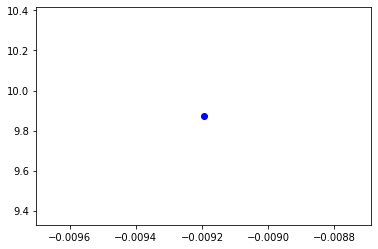

In [98]:
import matplotlib.pyplot as plt
plt.plot(portfolio1[0], portfolio1[1], 'o', color = 'blue')

We see we have a negative return with some risk. Let's generate some more random portfolios and see what we get. 

In [86]:
randoms = []
for j in range(100):

  weights = [0, 0, 0, 0, 0]
  sum = 0

  for i in range(5):
    weights[i] = random.random()
    sum = sum + weights[i]

  for i in range(5):
    weights[i] = weights[i]/sum

  randoms.append(weights)

randoms[0]

[0.09064327463982849,
 0.2816221247152452,
 0.2272130482262949,
 0.33831539683937345,
 0.062206155579257925]

In [92]:
x = []
y = []

for k in range(100):
  a = 0
  b = 0
  for i in range(5):
    a = returns[i] * randoms[k][i]
    b = np.power(std[i], 2) * randoms[k][i]
  x.append(a)
  b = np.sqrt(b)
  y.append(b)

x
y

[6.414409881175912,
 11.6257159257102,
 12.359674073881934,
 6.887134219111122,
 12.233061116020888,
 6.322800124162029,
 11.862110078389673,
 15.544610981070676,
 12.132680031348569,
 3.870907441375115,
 12.83192742107995,
 2.372727062130453,
 9.968520458865928,
 10.258123846456751,
 8.370724964593151,
 10.604666239260789,
 6.6670015815230705,
 13.320948778123256,
 10.377534661404553,
 11.203259237470274,
 9.211104332727954,
 12.922814146578023,
 14.334871368580233,
 15.563092884171772,
 14.11493003199611,
 16.011901135473934,
 9.91490085556425,
 11.483243922870534,
 13.314770513071077,
 10.935264902804043,
 15.023056564660902,
 14.46139125812235,
 8.15002463508153,
 7.369498902562006,
 11.540965560298886,
 11.307203046475006,
 11.916948812781989,
 13.668227988824228,
 11.807432650768337,
 14.328598029710841,
 14.616511739128203,
 10.513663507329543,
 6.515633161610734,
 10.840090087455273,
 7.020010581213492,
 10.874320500505709,
 4.165597938769631,
 0.7261203437399378,
 11.820676021

In [ ]:
for i in range(len(x)): 
  x[i] = -x[i]

Text(0.5, 1.0, 'random portfolios')

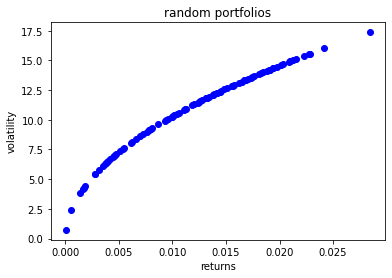

In [104]:
plt.scatter(x, y, color = 'blue')
plt.xlabel('returns')
plt.ylabel('volatility')
plt.title('random portfolios')

It appears these portfolios on the outside of the line are all efficient, per our algorithm. 